In [1]:
import pandas as pd

import torch
from torch import nn
from torch import Tensor
import math
import configparser
from torch.utils.data import Dataset, DataLoader

from torch import cuda


In [2]:
file = open('Avg_data.csv','r')
df = pd.read_csv(file)
df

,Date,Day of the week [-],Temp [C],Humidity [%],Wind [m/s],Clouds [1/8],SUM - Entry [GWh/d],SUM - Exit [GWh/d],SUM - Exit t-1d [GWh/d],Storage t-1d [GWh/d],Storage [GWh/d]
0,01/01/2017,7.0,-2.078947,85.666667,2.817778,2.587273,466.017771,555.507468,555.507468,179.179566,179.179566
1,02/01/2017,1.0,-1.885965,83.711111,2.886667,2.647273,482.377191,615.189159,555.507468,179.179566,185.100405
2,03/01/2017,2.0,-1.631579,89.711111,3.633333,3.312727,507.121338,623.232658,615.189159,185.100405,218.470698
3,04/01/2017,3.0,0.229825,88.800000,5.257778,4.689091,484.296908,626.042006,623.232658,218.470698,207.183162
4,05/01/2017,4.0,-5.033333,80.111111,4.384444,3.974545,483.992000,689.796844,626.042006,207.183162,223.941467
...,...,...,...,...,...,...,...,...,...,...,...
1821,27/12/2021,3.0,-10.050877,85.044444,1.824444,1.736364,586.072921,851.060055,778.596491,116.434676,164.700744
1822,28/12/2021,4.0,-5.714035,86.422222,3.097778,3.038182,620.830330,914.931349,851.060055,164.700744,205.577578
1823,29/12/2021,5.0,-1.770175,91.611111,1.506667,1.430909,619.364426,878.801180,914.931349,205.577578,170.559363
1824,30/12/2021,6.0,2.092982,93.988889,1.960000,1.900000,508.063438,818.608756,878.801180,170.559363,176.970948


array([[<Axes: xlabel='Day of the week [-]', ylabel='Day of the week [-]'>,
        <Axes: xlabel='Temp [C]', ylabel='Day of the week [-]'>,
        <Axes: xlabel='Humidity [%]', ylabel='Day of the week [-]'>,
        <Axes: xlabel='Wind [m/s]', ylabel='Day of the week [-]'>,
        <Axes: xlabel='Clouds [1/8]', ylabel='Day of the week [-]'>,
        <Axes: xlabel='SUM - Entry [GWh/d]', ylabel='Day of the week [-]'>,
        <Axes: xlabel='SUM - Exit [GWh/d]', ylabel='Day of the week [-]'>,
        <Axes: xlabel='SUM - Exit t-1d [GWh/d]', ylabel='Day of the week [-]'>,
        <Axes: xlabel='Storage t-1d [GWh/d]', ylabel='Day of the week [-]'>,
        <Axes: xlabel='Storage [GWh/d]', ylabel='Day of the week [-]'>],
       [<Axes: xlabel='Day of the week [-]', ylabel='Temp [C]'>,
        <Axes: xlabel='Temp [C]', ylabel='Temp [C]'>,
        <Axes: xlabel='Humidity [%]', ylabel='Temp [C]'>,
        <Axes: xlabel='Wind [m/s]', ylabel='Temp [C]'>,
        <Axes: xlabel='Clouds [1/8]', yl

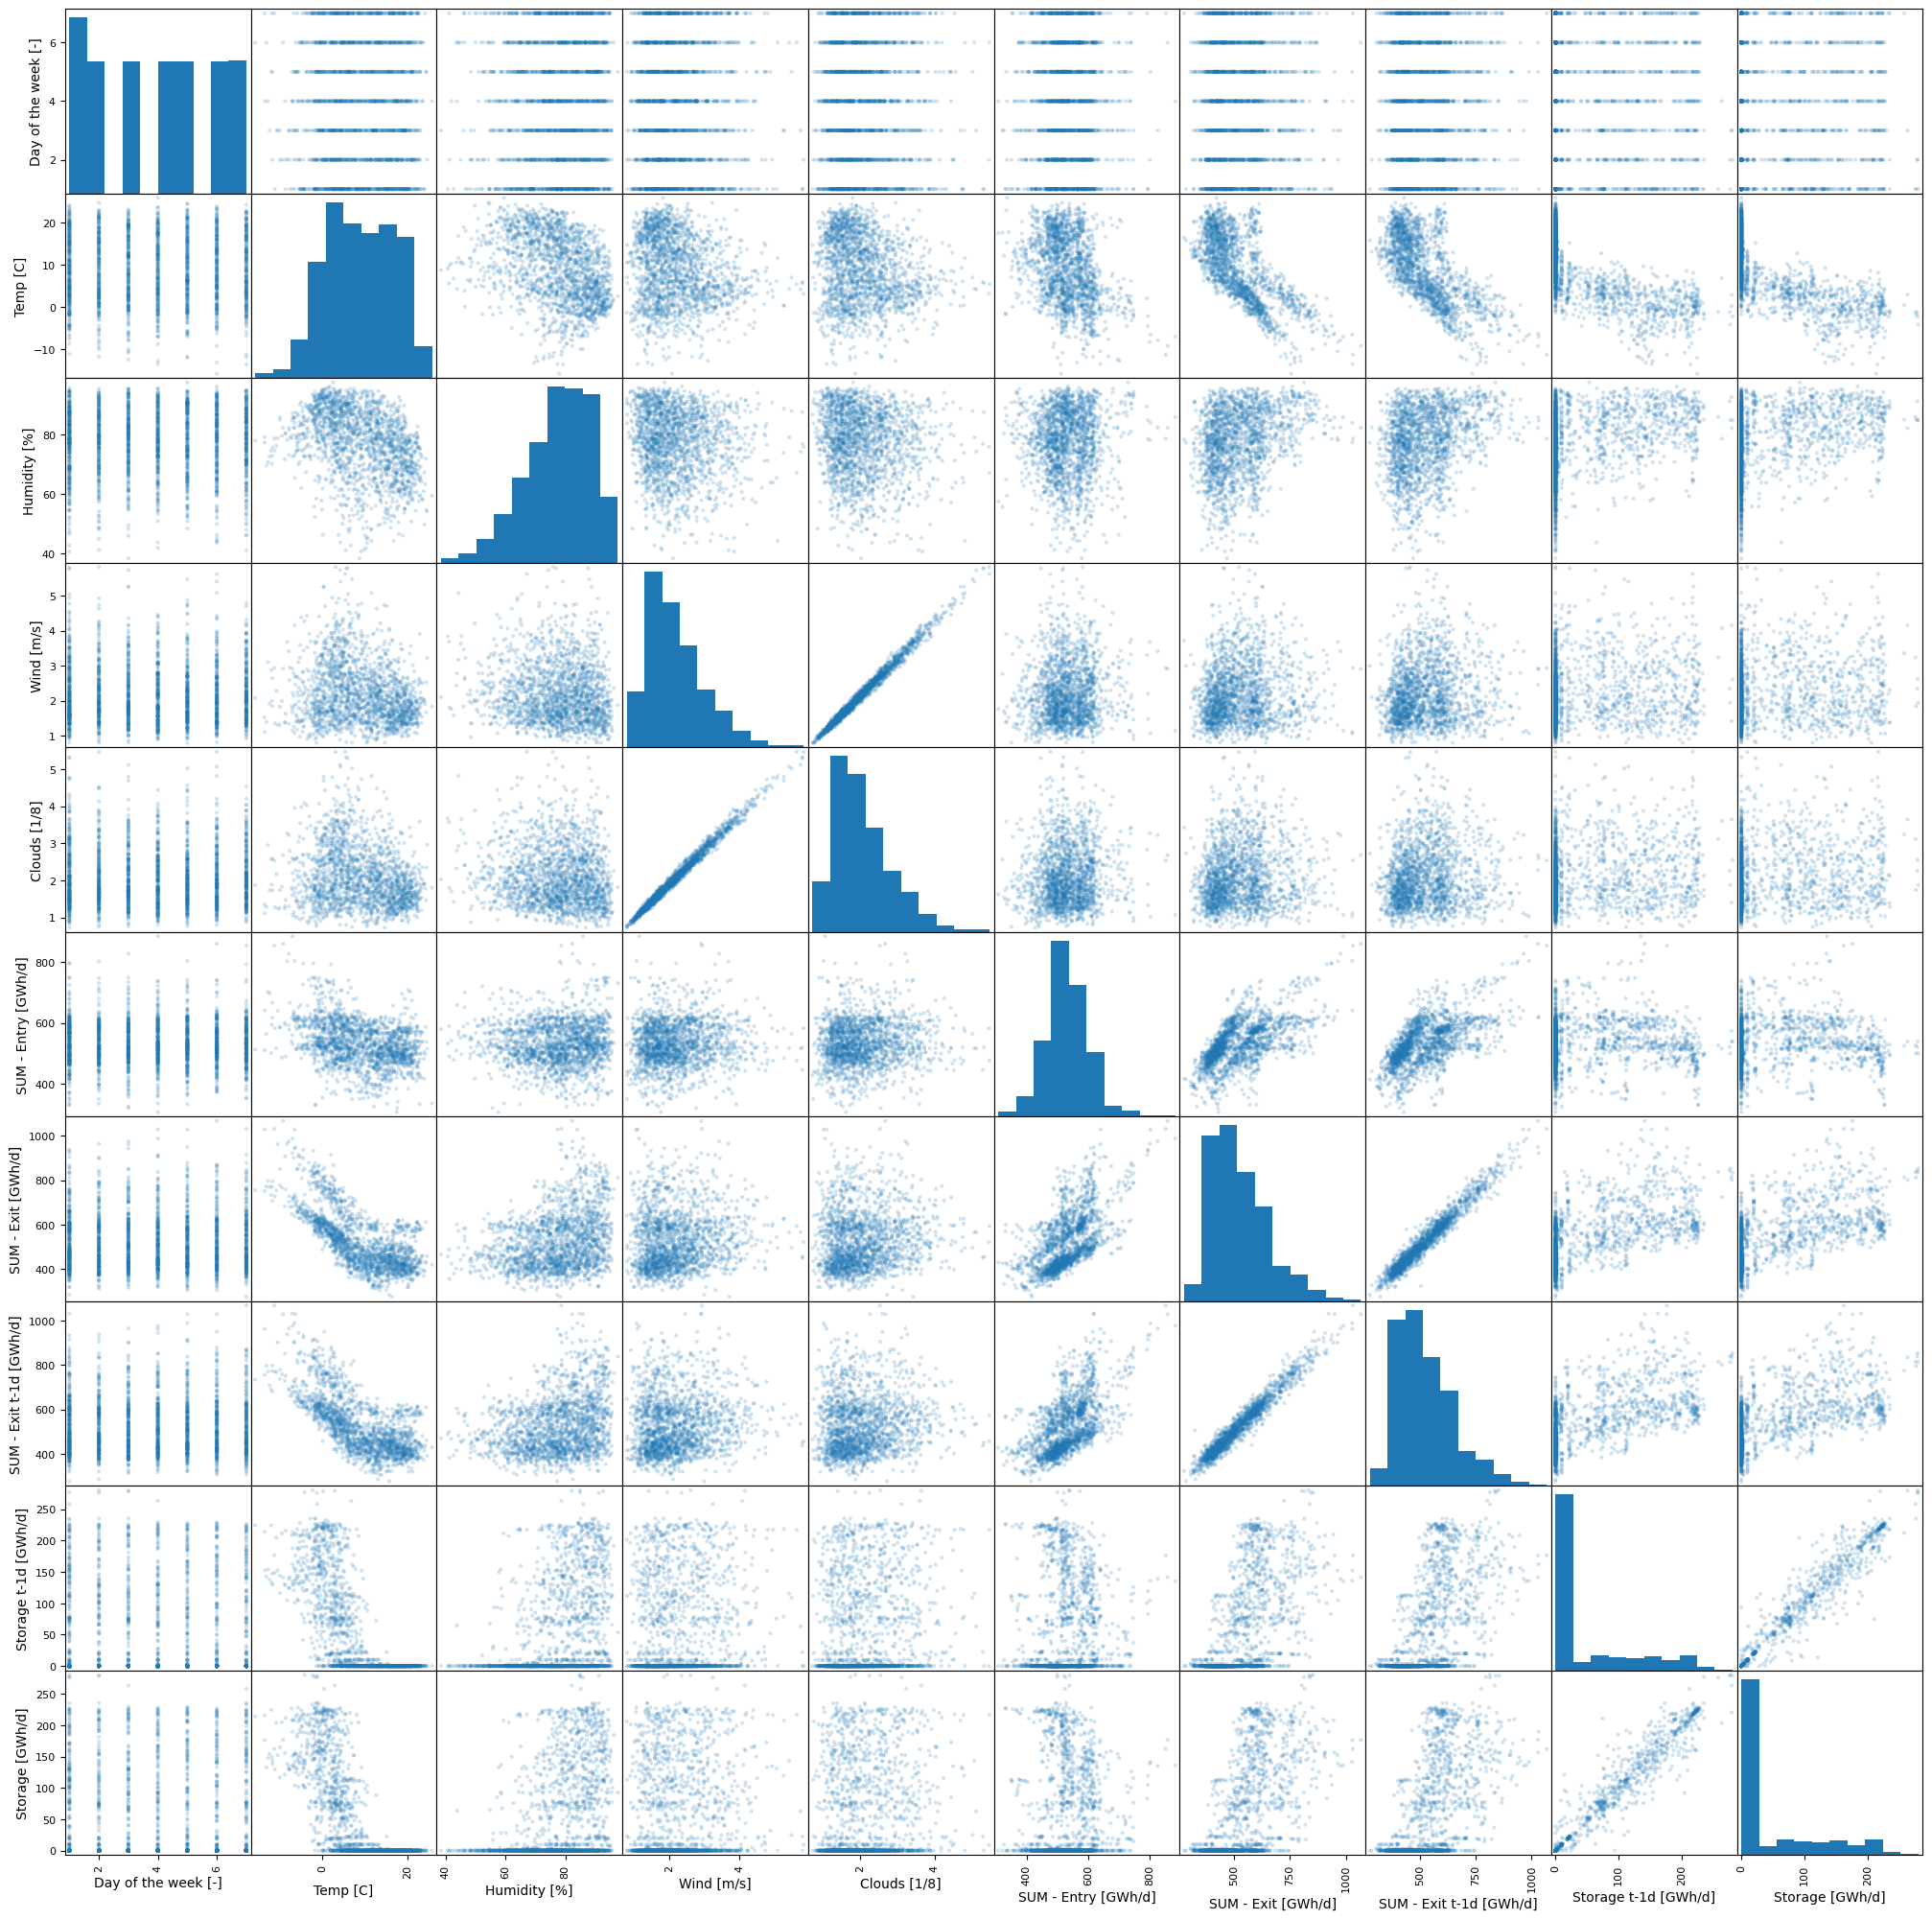

In [6]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (25,25))

In [3]:
df[["day", "month", "year"]] = df["Date"].str.split("/", expand = True)
df['day'] = df['day'].astype(float)
df['month'] = df['month'].astype(float)
df['year'] = df['year'].astype(float)

In [4]:
df = df.drop(['Date'],axis=1)

In [5]:
df.values

array([[ 7.00000000e+00, -2.07894737e+00,  8.56666667e+01, ...,
         1.00000000e+00,  1.00000000e+00,  2.01700000e+03],
       [ 1.00000000e+00, -1.88596491e+00,  8.37111111e+01, ...,
         2.00000000e+00,  1.00000000e+00,  2.01700000e+03],
       [ 2.00000000e+00, -1.63157895e+00,  8.97111111e+01, ...,
         3.00000000e+00,  1.00000000e+00,  2.01700000e+03],
       ...,
       [ 5.00000000e+00, -1.77017544e+00,  9.16111111e+01, ...,
         2.90000000e+01,  1.20000000e+01,  2.02100000e+03],
       [ 6.00000000e+00,  2.09298246e+00,  9.39888889e+01, ...,
         3.00000000e+01,  1.20000000e+01,  2.02100000e+03],
       [ 7.00000000e+00,  7.37017544e+00,  9.44666667e+01, ...,
         3.10000000e+01,  1.20000000e+01,  2.02100000e+03]])

In [6]:
data = torch.tensor(df.values)
data

tensor([[ 7.0000e+00, -2.0789e+00,  8.5667e+01,  ...,  1.0000e+00,
          1.0000e+00,  2.0170e+03],
        [ 1.0000e+00, -1.8860e+00,  8.3711e+01,  ...,  2.0000e+00,
          1.0000e+00,  2.0170e+03],
        [ 2.0000e+00, -1.6316e+00,  8.9711e+01,  ...,  3.0000e+00,
          1.0000e+00,  2.0170e+03],
        ...,
        [ 5.0000e+00, -1.7702e+00,  9.1611e+01,  ...,  2.9000e+01,
          1.2000e+01,  2.0210e+03],
        [ 6.0000e+00,  2.0930e+00,  9.3989e+01,  ...,  3.0000e+01,
          1.2000e+01,  2.0210e+03],
        [ 7.0000e+00,  7.3702e+00,  9.4467e+01,  ...,  3.1000e+01,
          1.2000e+01,  2.0210e+03]], dtype=torch.float64)

In [7]:
data[0]

tensor([ 7.0000e+00, -2.0789e+00,  8.5667e+01,  2.8178e+00,  2.5873e+00,
         4.6602e+02,  5.5551e+02,  5.5551e+02,  1.7918e+02,  1.7918e+02,
         1.0000e+00,  1.0000e+00,  2.0170e+03], dtype=torch.float64)

In [8]:
import series_transformer as st

dataset = st.CustomDataSet('Avg_data.csv',window_length=128,prediction_window=7)

dataset[0][0]

c:\Users\trzci\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


tensor([[ 3.1386e-03, -9.3214e-04,  3.8410e-02,  ...,  4.4837e-04,
          4.4837e-04,  9.0436e-01],
        [ 4.4449e-04, -8.3830e-04,  3.7209e-02,  ...,  8.8898e-04,
          4.4449e-04,  8.9654e-01],
        [ 8.7854e-04, -7.1671e-04,  3.9408e-02,  ...,  1.3178e-03,
          4.3927e-04,  8.8601e-01],
        ...,
        [ 4.6310e-04,  6.2989e-03,  3.7089e-02,  ...,  2.7786e-03,
          2.3155e-03,  9.3406e-01],
        [ 9.2468e-04,  5.2666e-03,  4.1611e-02,  ...,  3.2364e-03,
          2.3117e-03,  9.3254e-01],
        [ 1.3844e-03,  3.6230e-03,  3.7528e-02,  ...,  3.6918e-03,
          2.3074e-03,  9.3080e-01]])

In [9]:
params = st.ParameterProvider("series.config")
t1 = st.Transformer(params)

In [10]:
print(torch.cuda.is_available())
device_id = torch.cuda.current_device()
device_id

True


0

In [11]:
t1.cuda(device_id)

Transformer(
  (encoder_input_transformation): InputTransformation(
    (linear): Linear(in_features=13, out_features=32, bias=True)
  )
  (decoder_input_transformation): InputTransformation(
    (linear): Linear(in_features=13, out_features=32, bias=True)
  )
  (pos_encoding_in): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (pos_encoding_out): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder_stack): EncoderStack(
    (encoders): ModuleList(
      (0-5): 6 x EncoderLayer(
        (feed_forward): Sequential(
          (0): Linear(in_features=32, out_features=64, bias=True)
          (1): ReLU()
          (2): Linear(in_features=64, out_features=32, bias=True)
        )
        (mha): MultiHeadedAttention(
          (heads): ModuleList(
            (0-3): 4 x AttentionHead(
              (l): Linear(in_features=100, out_features=200, bias=True)
              (WQ): Linear(in_features=32, out_features=12, bias=True)
              (WK

In [12]:
output = t1(torch.unsqueeze(dataset[0][0],0).to(torch.float).cuda(device_id), torch.unsqueeze(dataset[0][1],0).to(torch.float).cuda(device_id))

In [13]:
output.size()

torch.Size([1, 7, 13])

In [14]:
train_dataset, test_dataset = dataset.getSets()

In [15]:
st.train_cuda(t1,train_dataset,device_id,epochs=1000,verbose_delay=-1)

Epoch 0 of 100
Epoch loss: 0.016243835306065806
Epoch 1 of 100
Epoch loss: 0.0017591320265214457
Epoch 2 of 100
Epoch loss: 0.0016109663769765215
Epoch 3 of 100
Epoch loss: 0.001445342782549127
Epoch 4 of 100
Epoch loss: 0.0013386315042098855
Epoch 5 of 100
Epoch loss: 0.0012788471250069263
Epoch 6 of 100
Epoch loss: 0.00124287603931978
Epoch 7 of 100
Epoch loss: 0.0012207753146825315
Epoch 8 of 100
Epoch loss: 0.001202260163006221
Epoch 9 of 100
Epoch loss: 0.001195138058392331
Epoch 10 of 100
Epoch loss: 0.0011928862726943957
Epoch 11 of 100
Epoch loss: 0.0011871103908011127
Epoch 12 of 100
Epoch loss: 0.0011741621433324072
Epoch 13 of 100
Epoch loss: 0.0011579003147807968
Epoch 14 of 100
Epoch loss: 0.0011408307852201858
Epoch 15 of 100
Epoch loss: 0.0011297034358248375
Epoch 16 of 100
Epoch loss: 0.0011267616862950976
Epoch 17 of 100
Epoch loss: 0.0011231187645746612
Epoch 18 of 100
Epoch loss: 0.0011254032886976939
Epoch 19 of 100
Epoch loss: 0.0011200680401511924
Epoch 20 of 100


(0.00044328558189675297, 0.001)

7
torch.Size([13])
post pred [128, 129, 130, 131, 132, 133, 134]
output list [0.0018457379192113876, 0.002313427859917283, 0.0027834696229547262, 0.0032508810982108116, 0.0004636312078218907, 0.0004629695904441178, 0.0009227644186466932]
pred [0.009738117456436157, 0.009781524538993835, 0.009620659053325653, 0.009716629981994629, 0.009668506681919098, 0.009910151362419128, 0.010049879550933838]
len range 7
len output 7


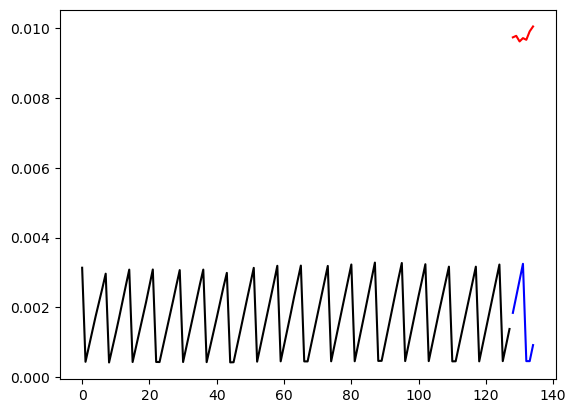

7
torch.Size([13])
post pred [128, 129, 130, 131, 132, 133, 134]
output list [0.0018303567776456475, 0.0020642271265387535, 0.004306239075958729, 0.005367619916796684, 0.005877542309463024, 0.006445836275815964, 0.006376787554472685]
pred [0.010669797658920288, 0.010741263628005981, 0.010912671685218811, 0.010921090841293335, 0.010857164859771729, 0.010909199714660645, 0.010807275772094727]
len range 7
len output 7


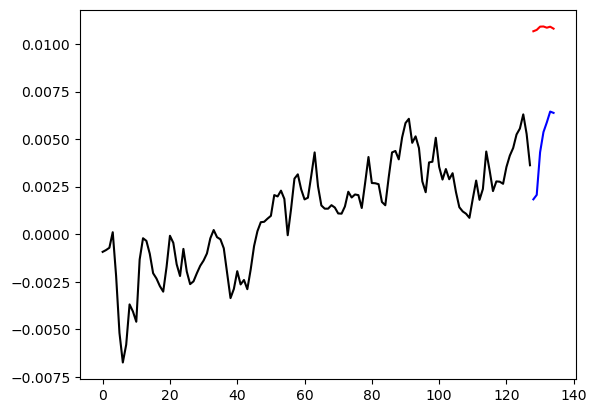

7
torch.Size([13])
post pred [128, 129, 130, 131, 132, 133, 134]
output list [0.0321209691464901, 0.03202298283576965, 0.032381027936935425, 0.03651823103427887, 0.03636929392814636, 0.030602289363741875, 0.03273250535130501]
pred [0.04175521433353424, 0.04207266867160797, 0.041971057653427124, 0.04204680025577545, 0.04211105406284332, 0.042193081229925156, 0.0419868528842926]
len range 7
len output 7


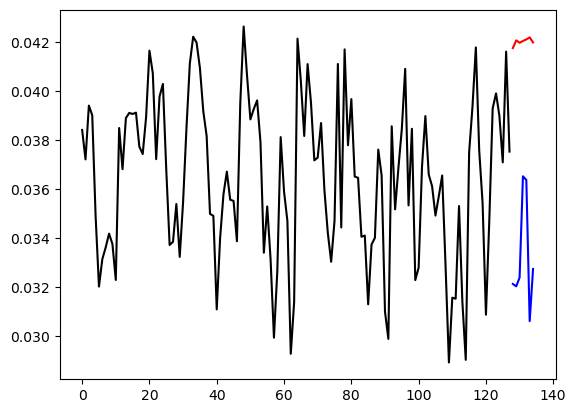

7
torch.Size([13])
post pred [128, 129, 130, 131, 132, 133, 134]
output list [0.0013771256199106574, 0.000903779175132513, 0.0011288515524938703, 0.0010846590157598257, 0.0007500522769987583, 0.0007068002596497536, 0.0008017797372303903]
pred [0.011455845087766647, 0.011456258594989777, 0.0114169642329216, 0.011541634798049927, 0.011549245566129684, 0.011759046465158463, 0.011483985930681229]
len range 7
len output 7


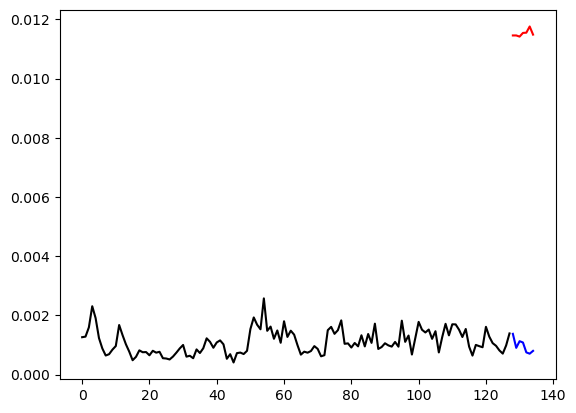

7
torch.Size([13])
post pred [128, 129, 130, 131, 132, 133, 134]
output list [0.0012324495473876595, 0.0008378815255127847, 0.0009919273434206843, 0.0010191722540184855, 0.0006878601270727813, 0.0005993351805955172, 0.0007038175826892257]
pred [0.0031355172395706177, 0.003237631171941757, 0.0029745958745479584, 0.0030798539519309998, 0.003106478601694107, 0.0030020885169506073, 0.003061816096305847]
len range 7
len output 7


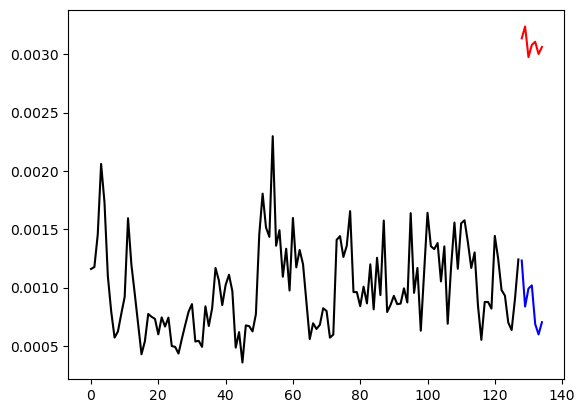

7
torch.Size([13])
post pred [128, 129, 130, 131, 132, 133, 134]
output list [0.23500727117061615, 0.22798216342926025, 0.23418237268924713, 0.23285777866840363, 0.23116375505924225, 0.2314683496952057, 0.2305734008550644]
pred [0.22759124636650085, 0.22762319445610046, 0.22750690579414368, 0.22761616110801697, 0.22760573029518127, 0.22761079668998718, 0.227649986743927]
len range 7
len output 7


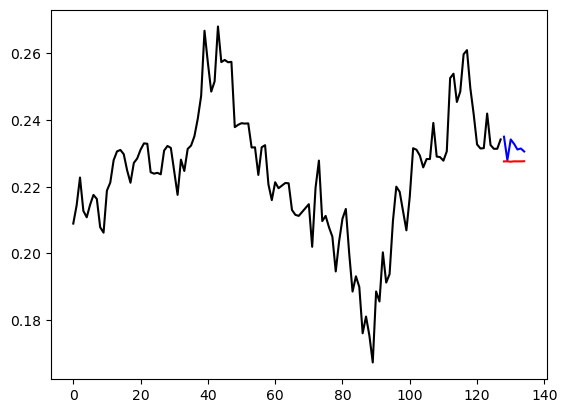

7
torch.Size([13])
post pred [128, 129, 130, 131, 132, 133, 134]
output list [0.19681833684444427, 0.1925668716430664, 0.17668816447257996, 0.1887822151184082, 0.1874818205833435, 0.19582194089889526, 0.2038474977016449]
pred [0.2139490842819214, 0.21406304836273193, 0.21405979990959167, 0.21399492025375366, 0.21415740251541138, 0.2141224443912506, 0.21397066116333008]
len range 7
len output 7


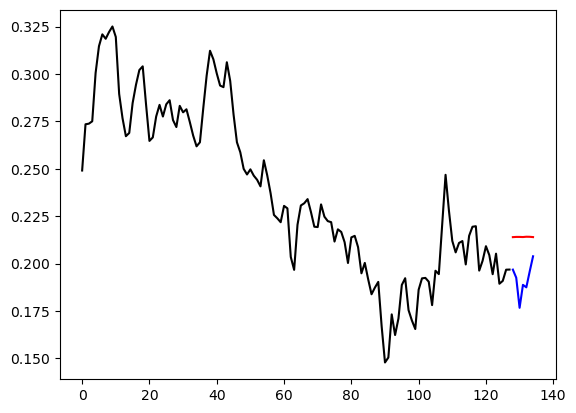

In [16]:
for i in range(7):

    st.output_and_show(t1,train_dataset[0][0],train_dataset[0][2],device_id,i)